<h1>Importing Necessary Data
</h1>

In [36]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import confusion_matrix

<h1>Read File</h1>

In [4]:
# Read Excel file
sonar_data = pd.read_csv('SonarData.csv',header=None)  # Make sure 'data.xlsx' is in your working directory

# Show first few rows
sonar_data.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
sonar_data.shape

(208, 61)

In [6]:
sonar_data.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [7]:
sonar_data[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

<h1>
    R ---> Rock <br>
M ---> Mine
</h1>

In [8]:
sonar_data.groupby(60).mean()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
60,,,,,,,,,,,,,,,,,,,,,
M,0.034989,0.045544,0.050720,0.064768,0.086715,0.111864,0.128359,0.149832,0.213492,0.251022,...,0.019352,0.016014,0.011643,0.012185,0.009923,0.008914,0.007825,0.009060,0.008695,0.006930
R,0.022498,0.030303,0.035951,0.041447,0.062028,0.096224,0.114180,0.117596,0.137392,0.159325,...,0.012311,0.010453,0.009640,0.009518,0.008567,0.007430,0.007814,0.006677,0.007078,0.006024


In [9]:
X = sonar_data.drop(columns=60,axis=1)
y = sonar_data[60]

In [10]:
X

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0203,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0051,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0155,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0042,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048


In [11]:
y

0      R
1      R
2      R
3      R
4      R
      ..
203    M
204    M
205    M
206    M
207    M
Name: 60, Length: 208, dtype: object

<h1>Outlier Detection</h1>

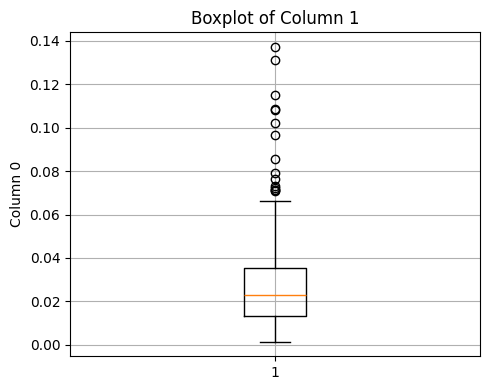

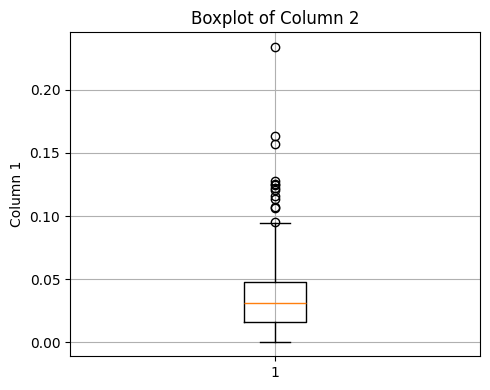

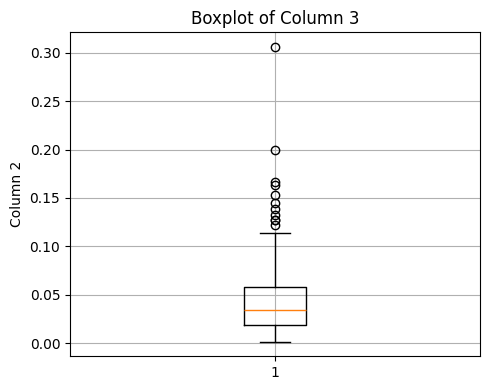

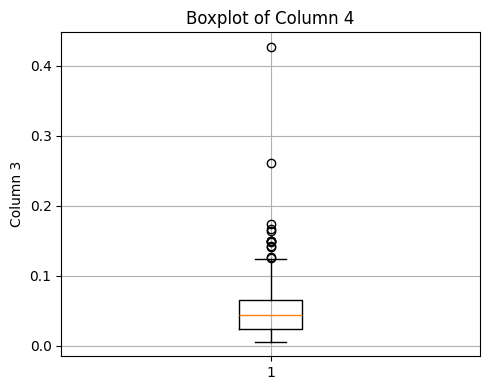

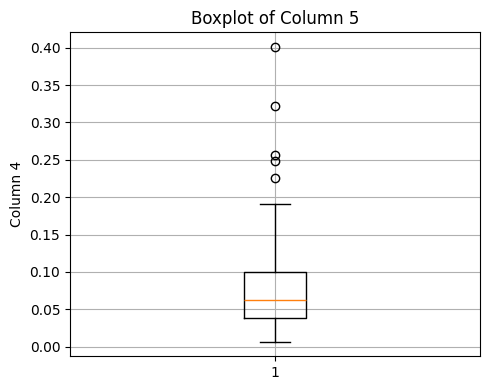

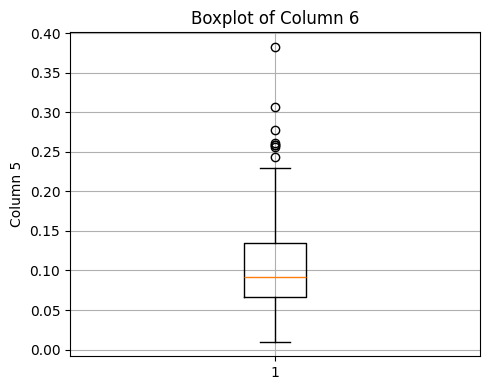

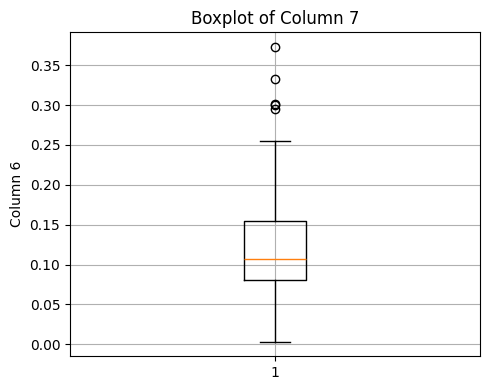

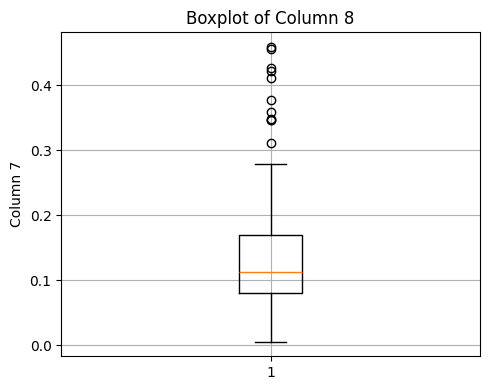

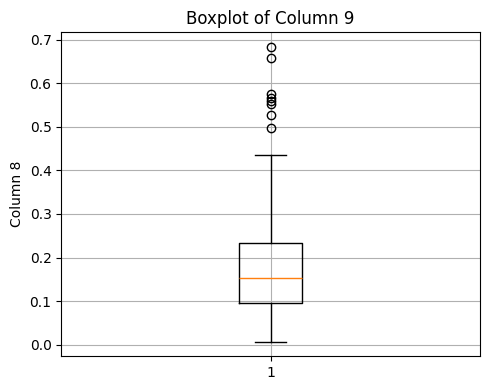

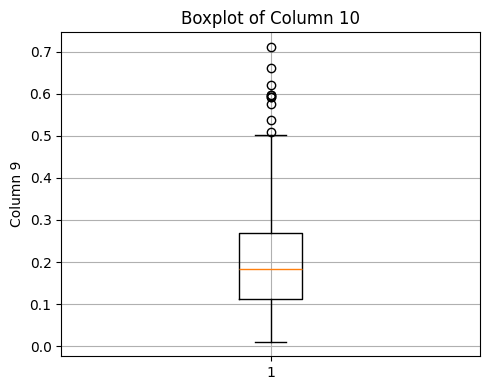

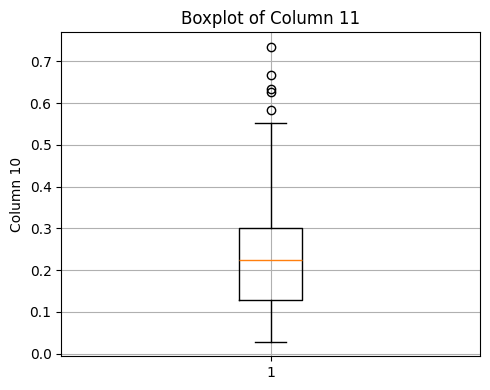

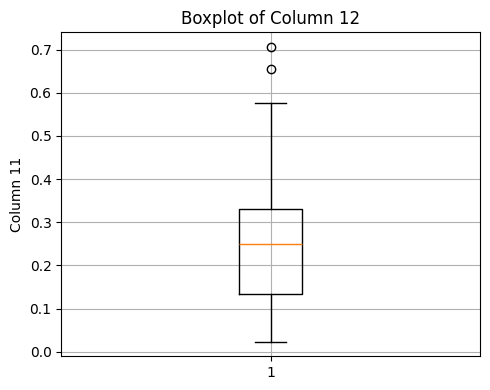

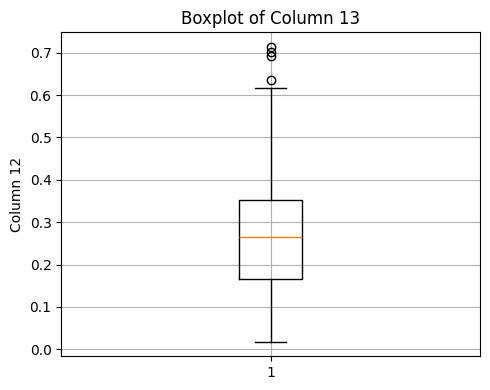

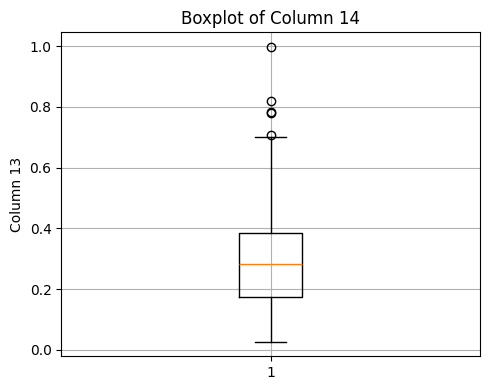

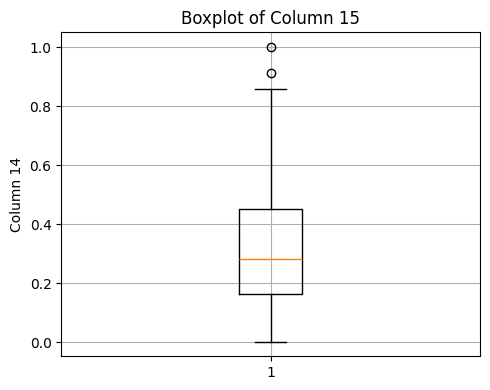

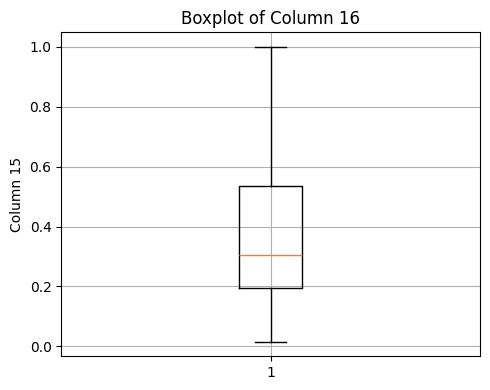

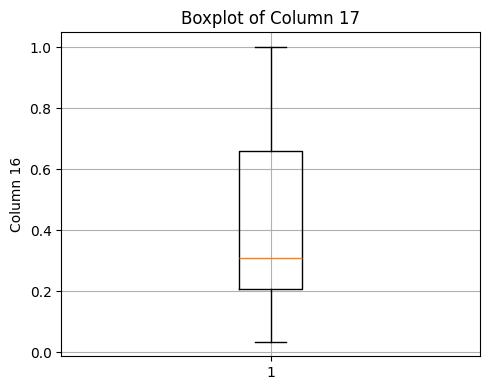

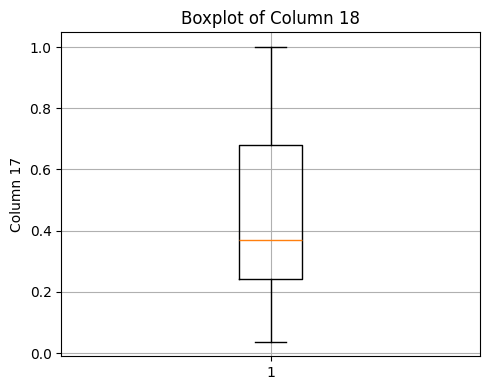

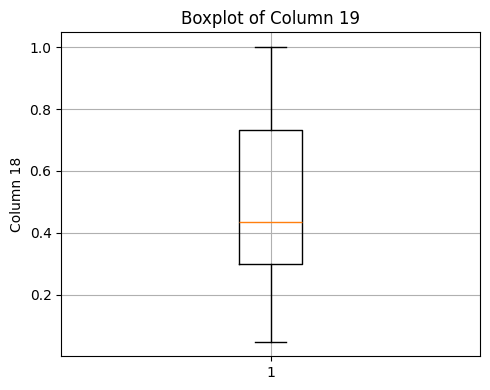

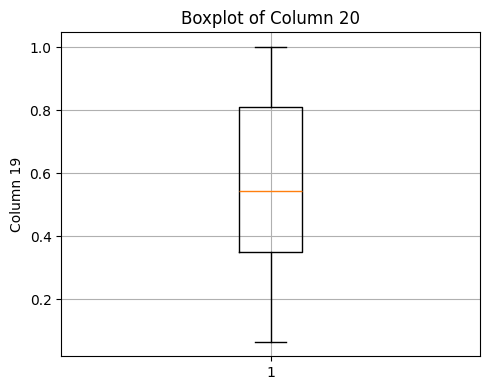

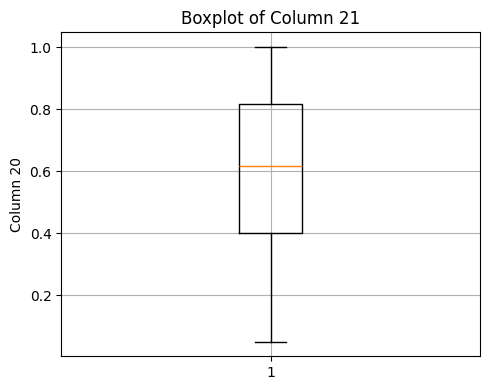

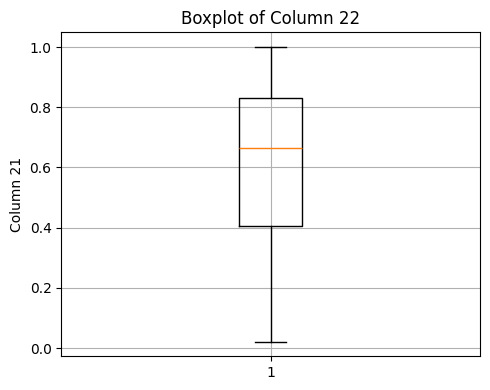

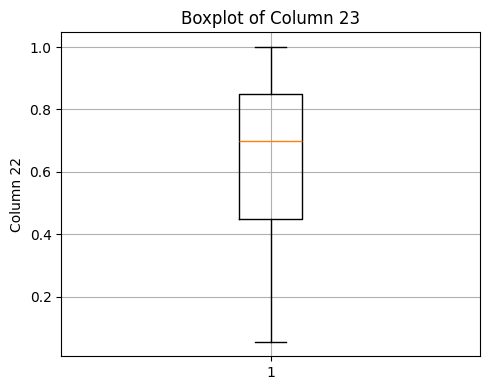

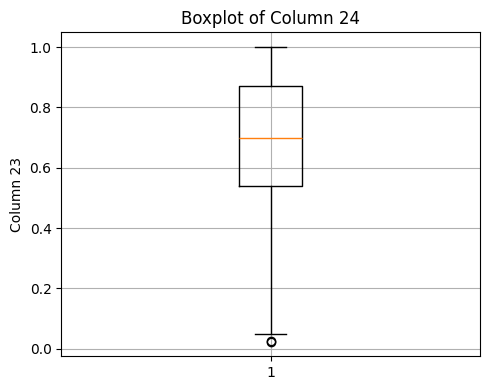

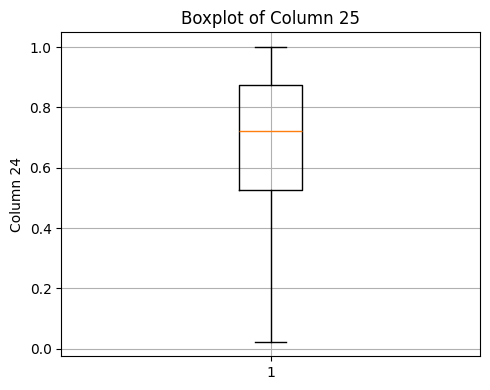

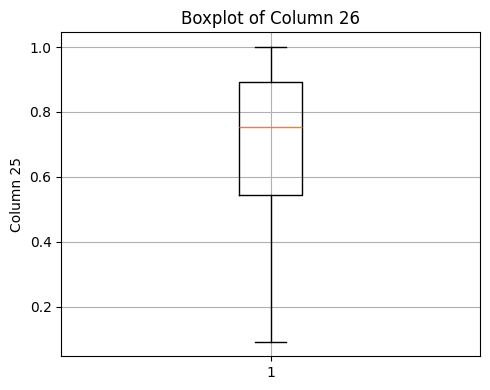

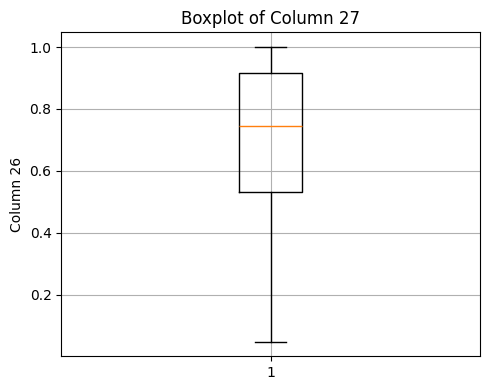

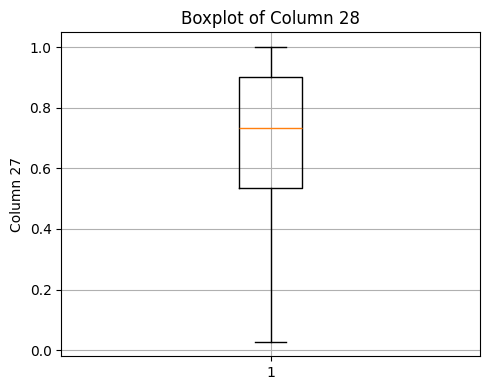

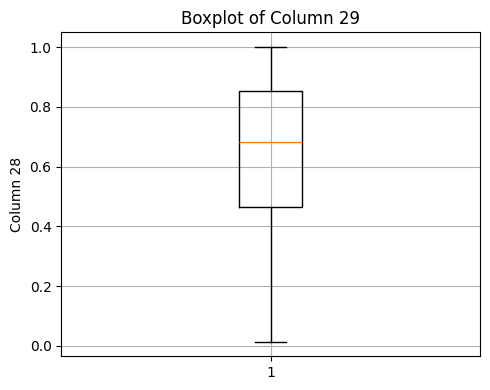

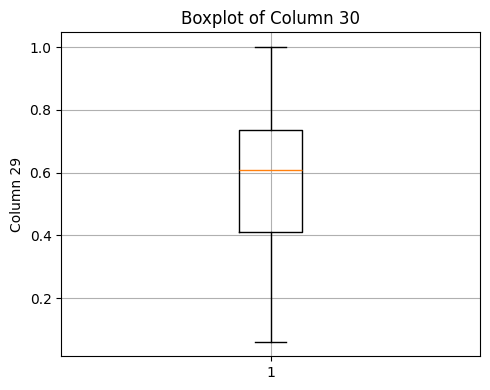

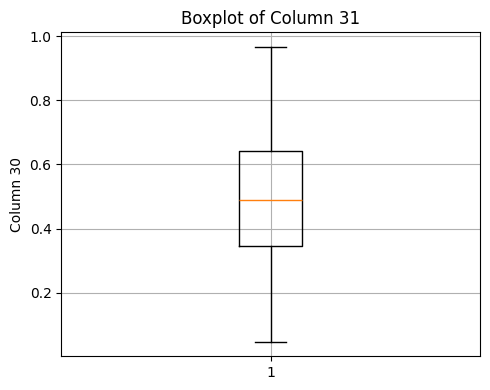

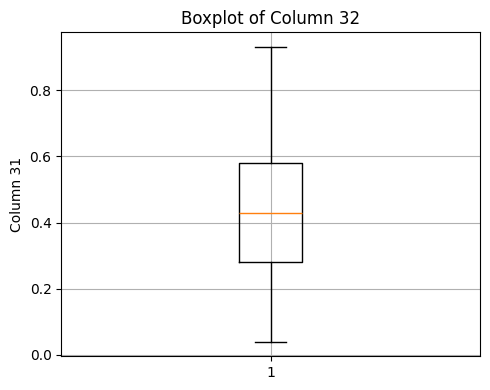

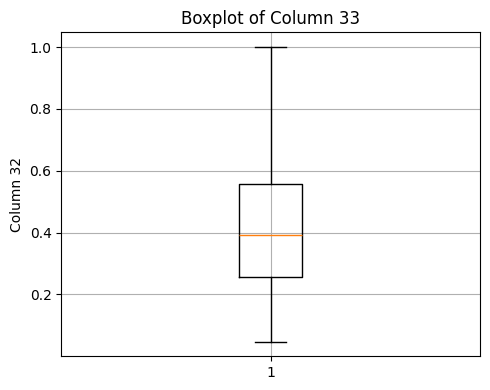

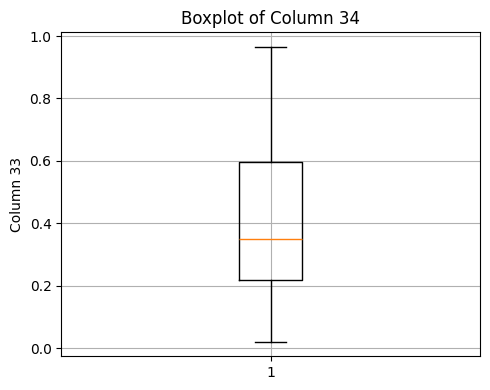

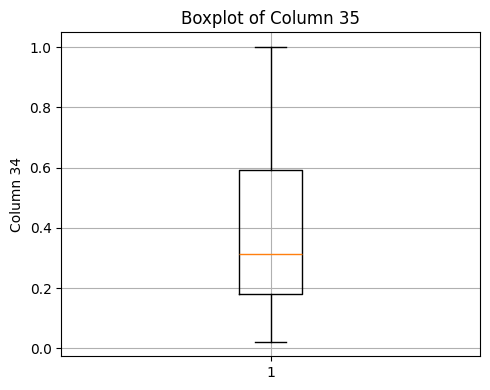

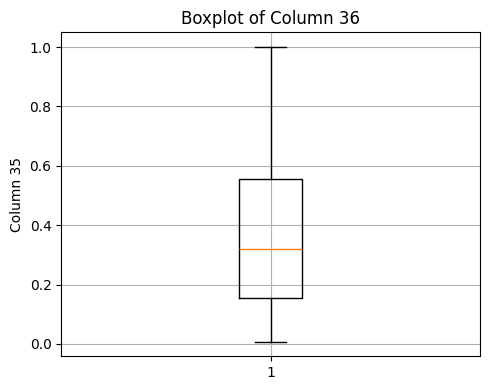

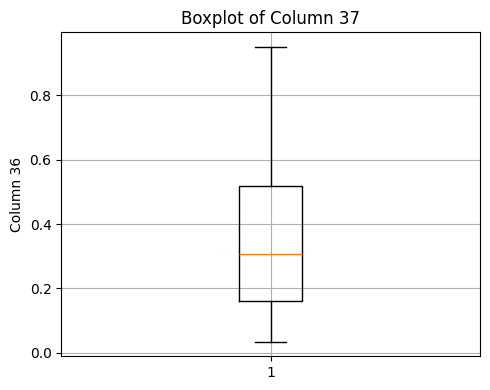

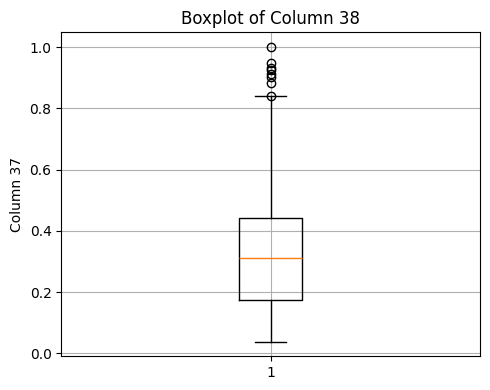

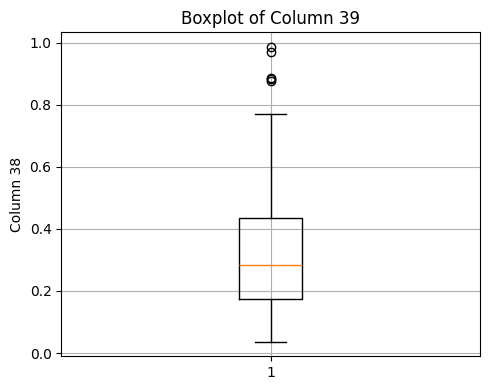

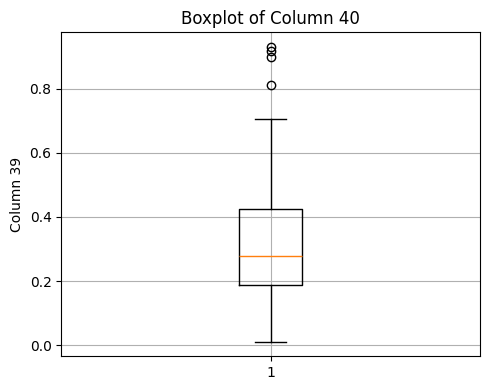

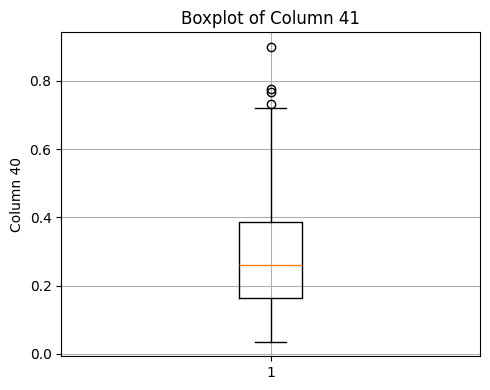

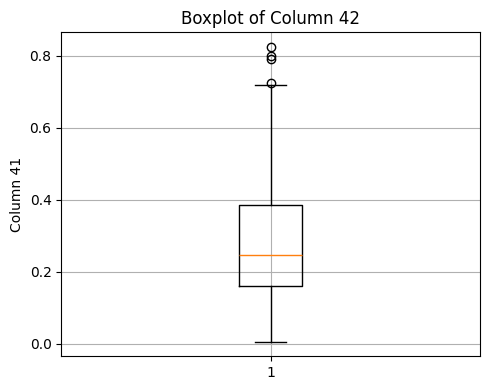

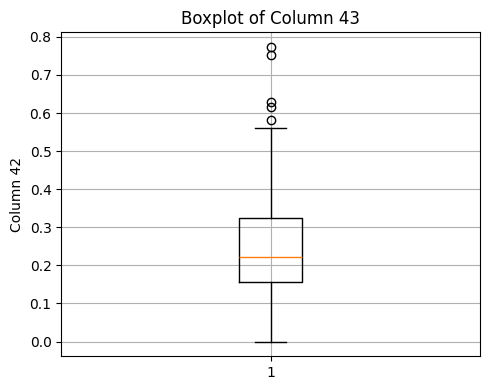

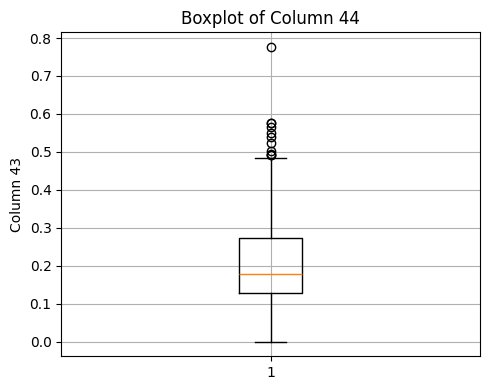

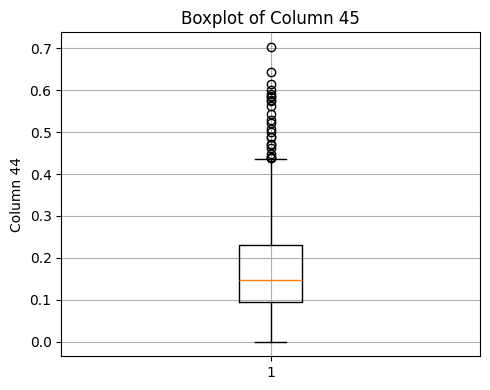

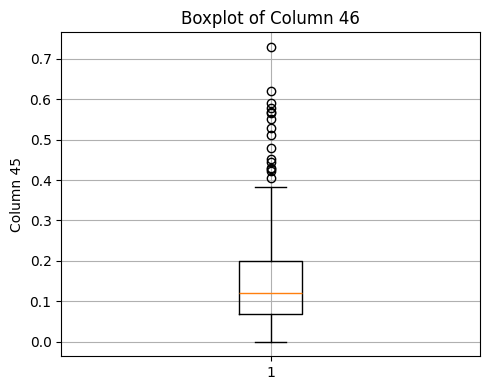

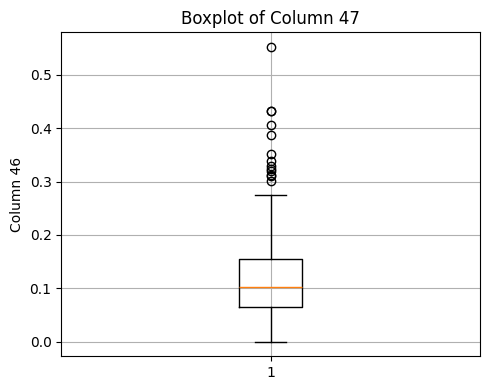

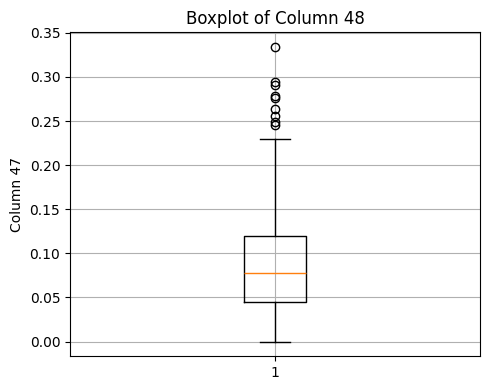

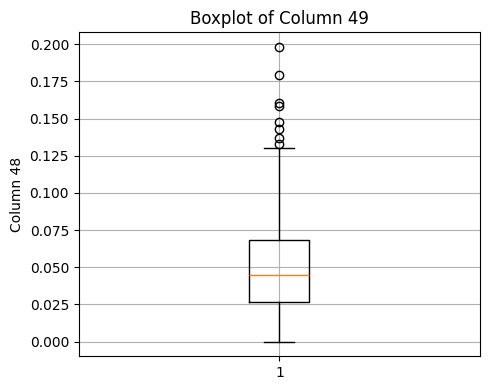

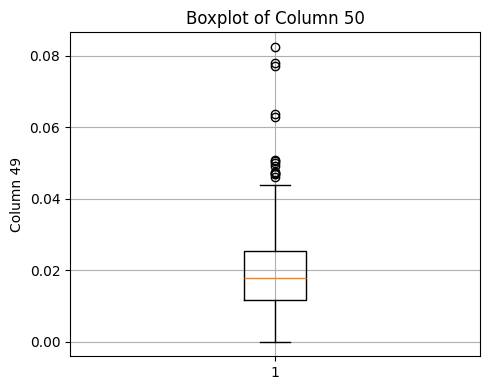

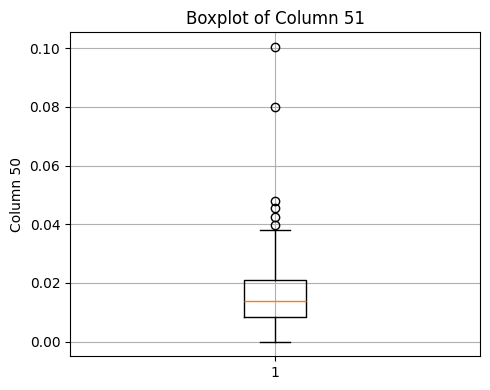

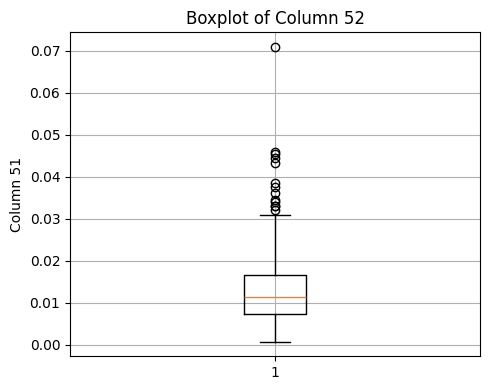

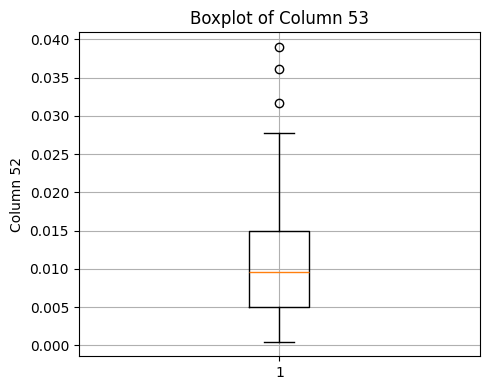

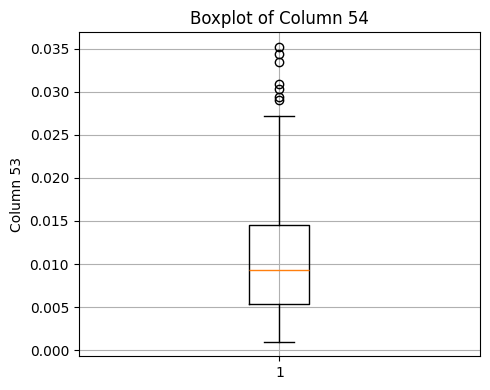

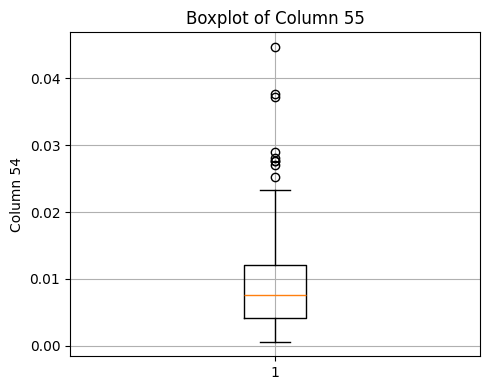

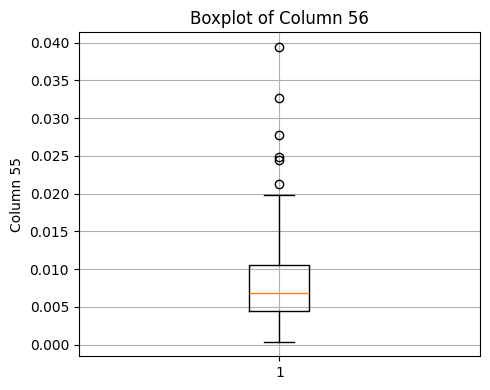

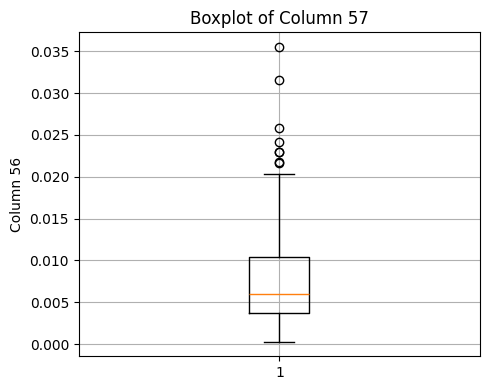

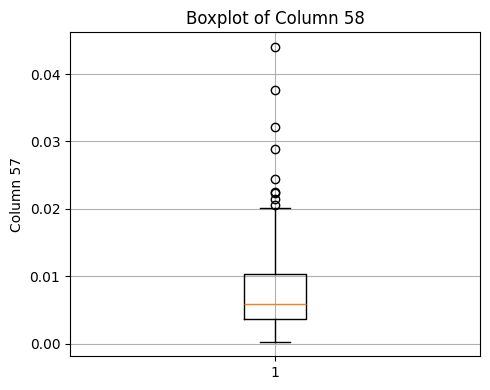

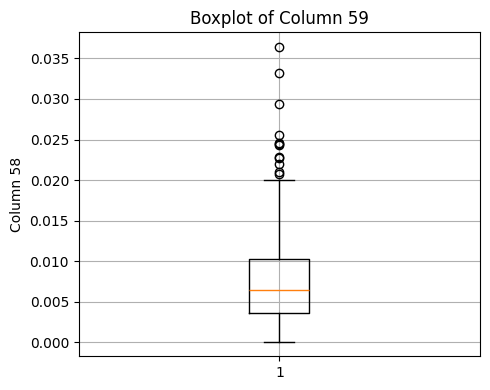

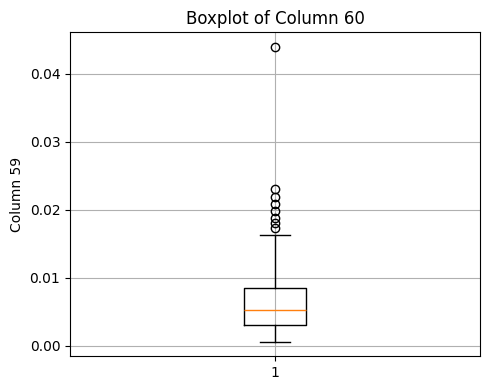

IndexError: single positional indexer is out-of-bounds

<Figure size 500x400 with 0 Axes>

In [12]:
# Loop through each column index
for i in range(sonar_data.shape[1]):  # df.shape[1] = number of columns
    plt.figure(figsize=(5, 4))
    plt.boxplot(X.iloc[:, i].dropna())
    plt.title(f"Boxplot of Column {i+1}")
    plt.ylabel(f"Column {i}")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h1>Logistic Regression Training And Test Data</h1>

In [18]:
logistic=LogisticRegression()
logistic.fit(X_train, y_train)


LogisticRegression()

In [19]:
# accuracy on train data 
y_train_pred = logistic.predict(X_train)
acc=accuracy_score(y_train, y_train_pred)
print("Accuracy:", acc)


Accuracy: 0.8373493975903614


In [20]:
# accuracy on test data 
y_pred= logistic.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.7857142857142857


In [21]:
def logisticTraining(trial):
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet"])
    solver = trial.suggest_categorical("solver", ["liblinear", "saga"])
    C = trial.suggest_float("C", 1e-4, 10.0, log=True)

    # Validate combinations
    if penalty == "l1" and solver not in ["liblinear", "saga"]:
        raise optuna.exceptions.TrialPruned()
    if penalty == "elasticnet" and solver != "saga":
        raise optuna.exceptions.TrialPruned()

    # Optional l1_ratio for elasticnet
    if penalty == "elasticnet":
        l1_ratio = trial.suggest_float("l1_ratio", 0.0, 1.0)
        model = LogisticRegression(
            penalty=penalty,
            solver=solver,
            C=C,
            l1_ratio=l1_ratio,
            max_iter=1000,
            random_state=42
        )
    else:
        model = LogisticRegression(
            penalty=penalty,
            solver=solver,
            C=C,
            max_iter=1000,
            random_state=42
        )

    return cross_val_score(model, X_train, y_train, cv=5, scoring="accuracy").mean()


In [22]:
# Run Optuna
logisticOptuna = optuna.create_study(direction="maximize")
logisticOptuna.optimize(logisticTraining, n_trials=200)


[I 2025-07-13 14:27:54,566] A new study created in memory with name: no-name-bd412ab8-3a84-4bc0-933a-40b6bd776901
[I 2025-07-13 14:27:54,617] Trial 0 finished with value: 0.5121212121212121 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 0.0001104335569732696}. Best is trial 0 with value: 0.5121212121212121.
[I 2025-07-13 14:27:54,846] Trial 1 finished with value: 0.7352941176470587 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.5969804613371026}. Best is trial 1 with value: 0.7352941176470587.
[I 2025-07-13 14:27:54,848] Trial 2 pruned. 
[I 2025-07-13 14:27:54,849] Trial 3 pruned. 
[I 2025-07-13 14:27:54,959] Trial 4 finished with value: 0.7714795008912656 and parameters: {'penalty': 'l1', 'solver': 'liblinear', 'C': 4.463340826041779}. Best is trial 4 with value: 0.7714795008912656.
[I 2025-07-13 14:27:55,012] Trial 5 finished with value: 0.49393939393939396 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.00023904480000469524}. Best is trial 4 wit

In [23]:
print("Best Hyperparameters:", logisticOptuna.best_params)
print("Best Accuracy:", logisticOptuna.best_value)


Best Hyperparameters: {'penalty': 'l2', 'solver': 'saga', 'C': 5.232987828754518}
Best Accuracy: 0.8014260249554368


In [24]:
best_params = logisticOptuna.best_params
# Extract params
penalty = best_params['penalty']
solver = best_params['solver']
C = best_params['C']
l1_ratio = best_params.get('l1_ratio')  # may not exist if not elasticnet

# Create final model
if penalty == 'elasticnet':
    final_model = LogisticRegression(
        penalty=penalty,
        solver=solver,
        C=C,
        l1_ratio=l1_ratio,
        max_iter=1000,
        random_state=42
    )
else:
    final_model = LogisticRegression(
        penalty=penalty,
        solver=solver,
        C=C,
        max_iter=1000,
        random_state=42
    )
    

In [25]:
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy from best Optuna model: {accuracy:.4f}")
cv_scores = cross_val_score(final_model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Cross-Validation Accuracy: {cv_scores.mean():.4f} ")

Test Accuracy from best Optuna model: 0.8095
Cross-Validation Accuracy: 0.8014 


<h1>Descision Tree Training and Testing
</h1>

In [26]:
DecisionTree = DecisionTreeClassifier( max_depth=8,               # Limit the depth of the tree
    min_samples_split=20,      # Minimum samples required to split an internal node
    min_samples_leaf=6,        # Minimum samples at a leaf node
    random_state=42)
DecisionTree.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, min_samples_split=20,
                       random_state=42)

In [27]:
# Predict on training data
y_train_pred = DecisionTree.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_accuracy)

Training Accuracy: 0.8795180722891566


In [28]:
# Predict on test data
y_test_pred = DecisionTree.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print("Test Accuracy:", test_accuracy)


Test Accuracy: 0.7619047619047619


In [29]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(DecisionTree, X, y, cv=5)
print("Cross-validation accuracy:", scores.mean())

Cross-validation accuracy: 0.6738675958188154


<h1>Desciion Tree Training using Optuna</h1>

In [30]:

def TreeTraining(trial):
    # Suggest hyperparameters to tune
    max_depth = trial.suggest_int("max_depth", 2, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 50)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)

    # Create the model with suggested params
    model = DecisionTreeClassifier(
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Cross-validation score (you can use train_test_split too)
    score = cross_val_score(DecisionTree, X_train, y_train, cv=5, scoring="accuracy")
    return score.mean()


In [31]:
DescisionTreeOptuna = optuna.create_study(direction="maximize")
DescisionTreeOptuna.optimize(TreeTraining, n_trials=200)  # Try 50 combinations

[I 2025-07-13 14:28:55,309] A new study created in memory with name: no-name-9837130f-ca92-4aec-b3b5-a035cfafcc6f
[I 2025-07-13 14:28:55,433] Trial 0 finished with value: 0.710873440285205 and parameters: {'max_depth': 4, 'min_samples_split': 50, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.710873440285205.
[I 2025-07-13 14:28:55,537] Trial 1 finished with value: 0.710873440285205 and parameters: {'max_depth': 16, 'min_samples_split': 27, 'min_samples_leaf': 13}. Best is trial 0 with value: 0.710873440285205.
[I 2025-07-13 14:28:55,641] Trial 2 finished with value: 0.710873440285205 and parameters: {'max_depth': 14, 'min_samples_split': 38, 'min_samples_leaf': 16}. Best is trial 0 with value: 0.710873440285205.
[I 2025-07-13 14:28:55,744] Trial 3 finished with value: 0.710873440285205 and parameters: {'max_depth': 4, 'min_samples_split': 50, 'min_samples_leaf': 6}. Best is trial 0 with value: 0.710873440285205.
[I 2025-07-13 14:28:55,852] Trial 4 finished with value: 0.7108734

In [32]:
print("Best parameters:", DescisionTreeOptuna.best_params)
print("Best accuracy:", DescisionTreeOptuna.best_value)


Best parameters: {'max_depth': 4, 'min_samples_split': 50, 'min_samples_leaf': 7}
Best accuracy: 0.710873440285205


Desision Tree and Optuna Don't give us more accuracy Thus we will go for the logisic regressiona 

<h1>Find Those Specific data of each Column That cause issue </h1>

In [33]:
# Predict on test data
y_test_pred = final_model.predict(X_test)
# Create DataFrame for comparison
comparison_df = pd.DataFrame({
    "Actual": y_test.reset_index(drop=True),
    "Predicted": pd.Series(y_test_pred)
})

# Add test features (optional but useful)
X_test_reset = X_test.reset_index(drop=True)
comparison_df = pd.concat([X_test_reset, comparison_df], axis=1)

# Filter only incorrect predictions
wrong_predictions = comparison_df[comparison_df["Actual"] != comparison_df["Predicted"]]

# Show them
print("Wrongly predicted rows on test set:")
wrong_predictions

Wrongly predicted rows on test set:


,0,1,2,3,4,5,6,7,8,9,...,52,53,54,55,56,57,58,59,Actual,Predicted
7,0.0094,0.0611,0.1136,0.1203,0.0403,0.1227,0.2495,0.4566,0.6587,0.5079,...,0.0175,0.0352,0.0158,0.0326,0.0201,0.0168,0.0245,0.0154,M,R
12,0.0211,0.0128,0.0015,0.0450,0.0711,0.1563,0.1518,0.1206,0.1666,0.1345,...,0.0023,0.0047,0.0049,0.0031,0.0024,0.0039,0.0051,0.0015,M,R
18,0.0378,0.0318,0.0423,0.0350,0.1787,0.1635,0.0887,0.0817,0.1779,0.2053,...,0.0044,0.0078,0.0102,0.0065,0.0061,0.0062,0.0043,0.0053,R,M
22,0.0307,0.0523,0.0653,0.0521,0.0611,0.0577,0.0665,0.0664,0.1460,0.2792,...,0.0189,0.0137,0.0277,0.0152,0.0052,0.0121,0.0124,0.0055,M,R
23,0.0335,0.0134,0.0696,0.1180,0.0348,0.1180,0.1948,0.1607,0.3036,0.4372,...,0.0232,0.0093,0.0159,0.0193,0.0032,0.0377,0.0126,0.0156,M,R
37,0.0137,0.0297,0.0116,0.0082,0.0241,0.0253,0.0279,0.0130,0.0489,0.0874,...,0.0040,0.0025,0.0036,0.0058,0.0067,0.0035,0.0043,0.0033,M,R
38,0.0408,0.0653,0.0397,0.0604,0.0496,0.1817,0.1178,0.1024,0.0583,0.2176,...,0.0129,0.0184,0.0069,0.0198,0.0199,0.0102,0.0070,0.0055,R,M
41,0.0197,0.0394,0.0384,0.0076,0.0251,0.0629,0.0747,0.0578,0.1357,0.1695,...,0.0097,0.0042,0.0058,0.0072,0.0041,0.0045,0.0047,0.0054,M,R


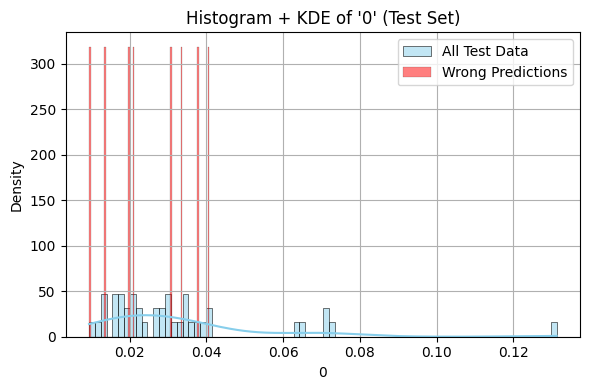

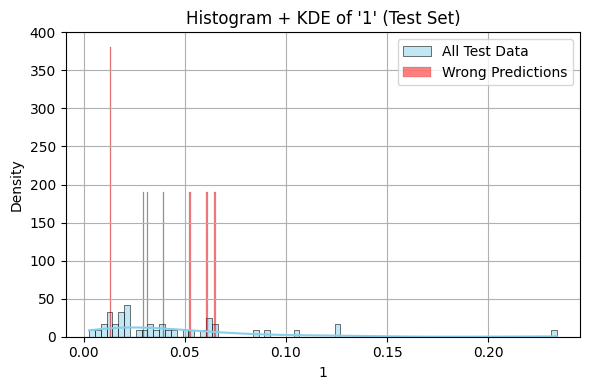

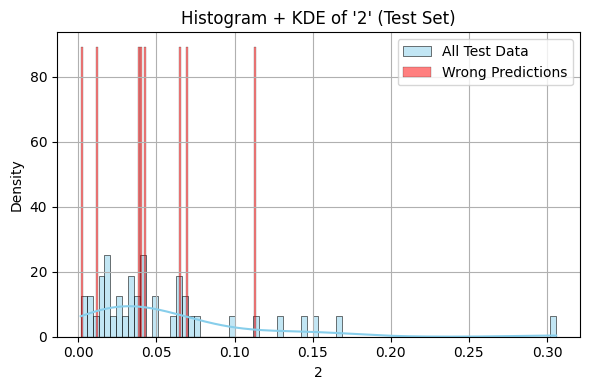

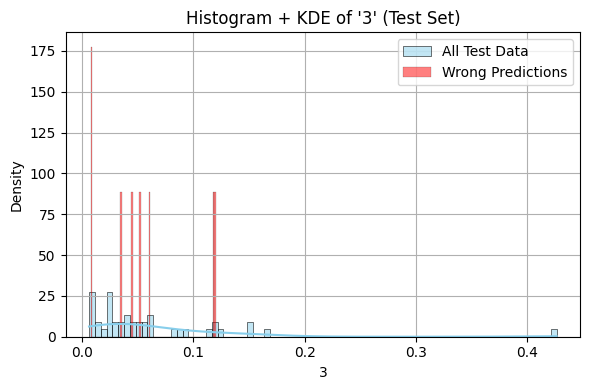

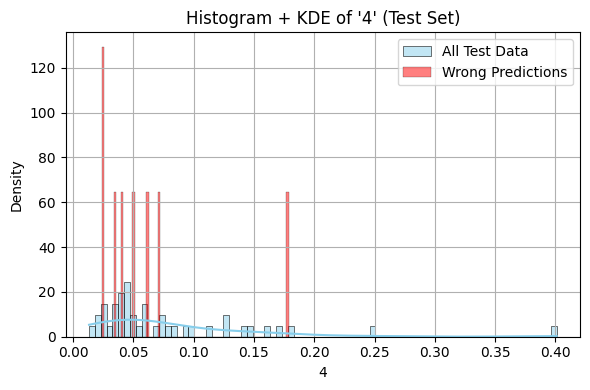

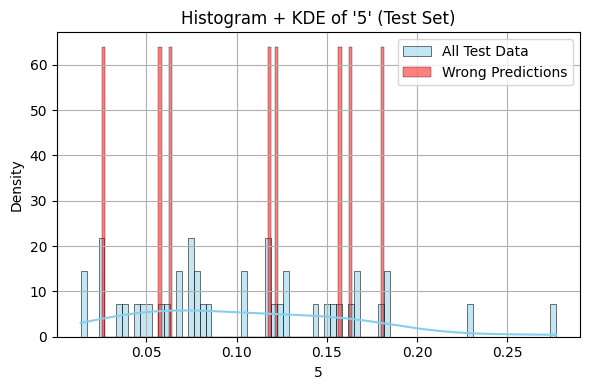

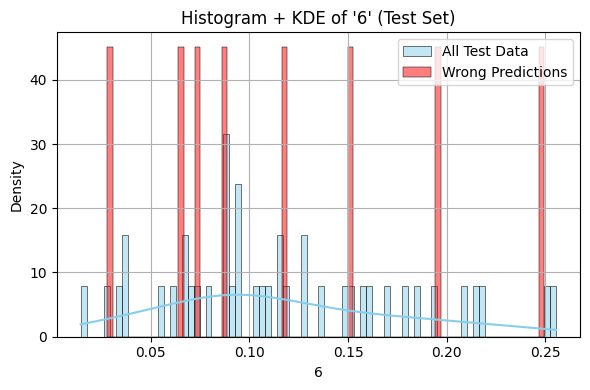

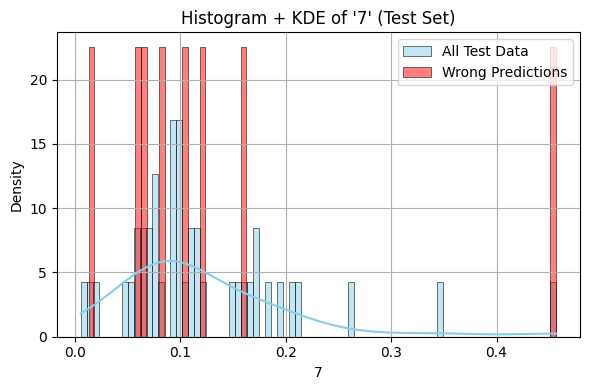

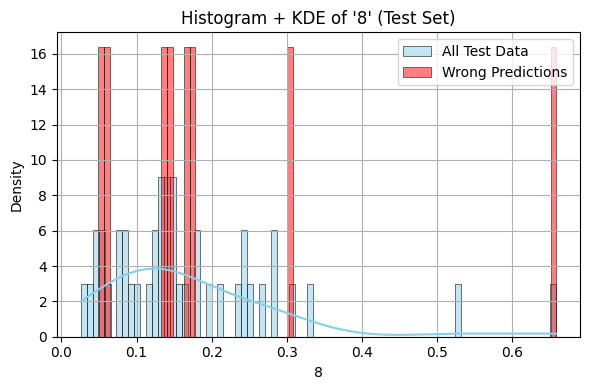

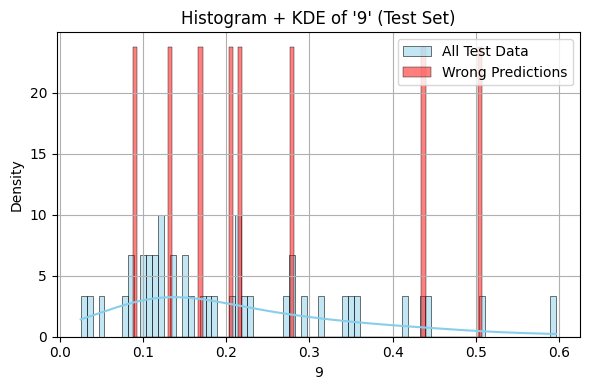

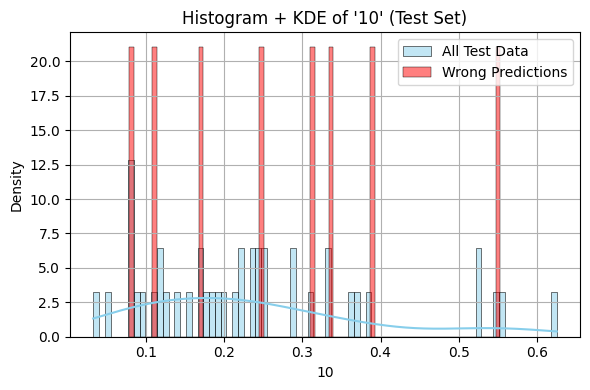

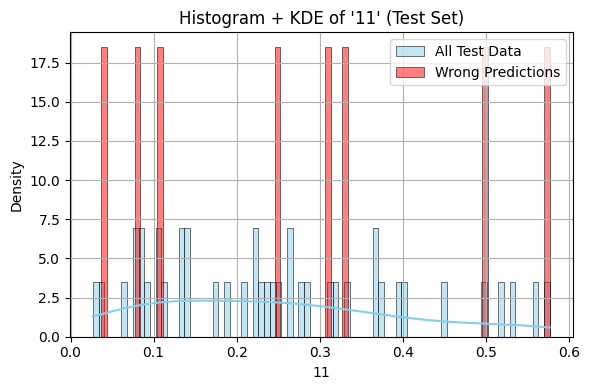

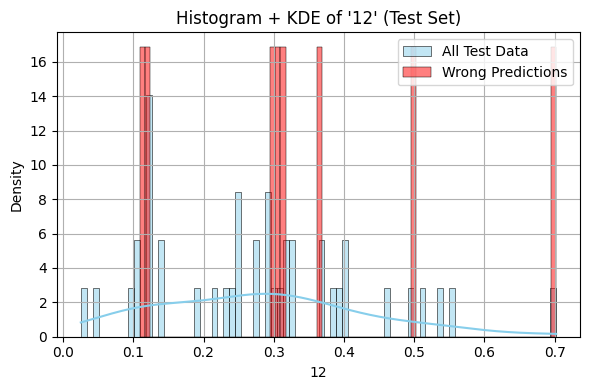

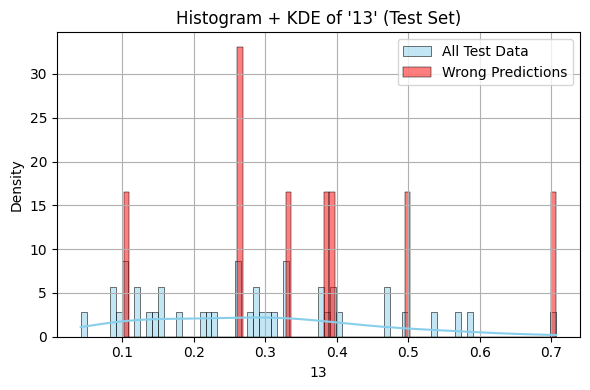

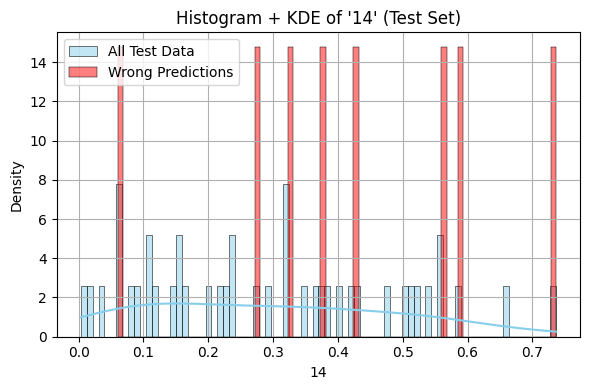

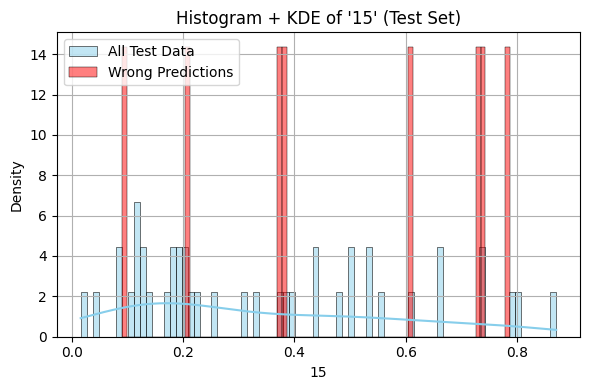

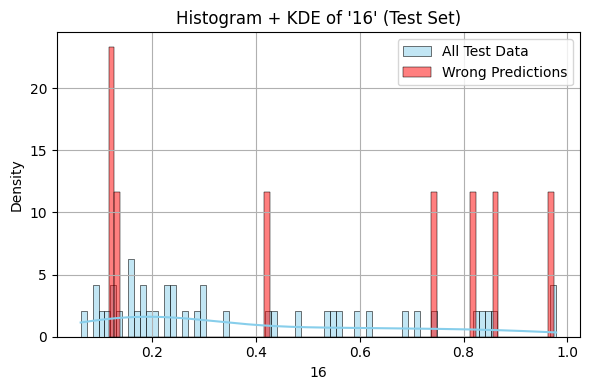

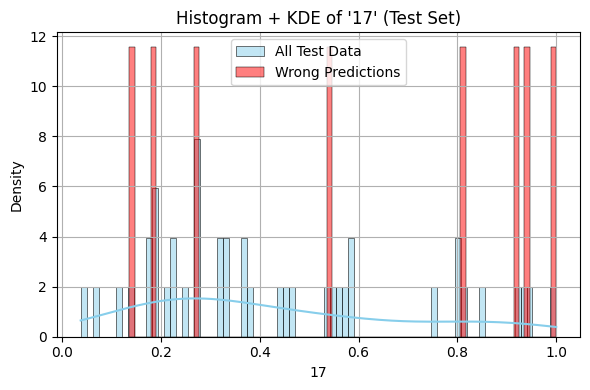

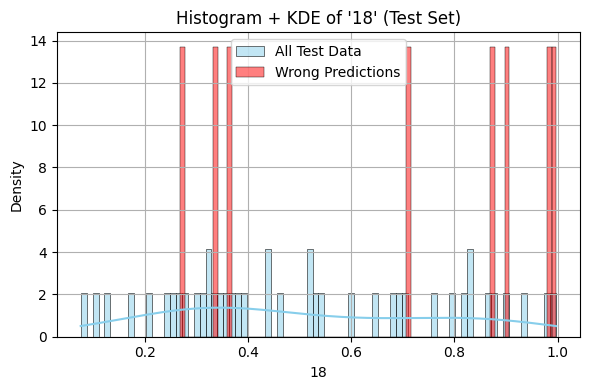

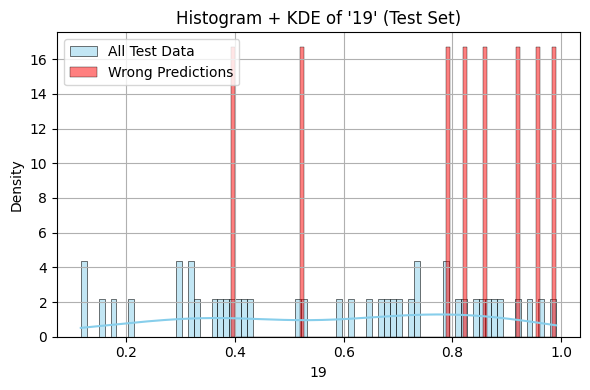

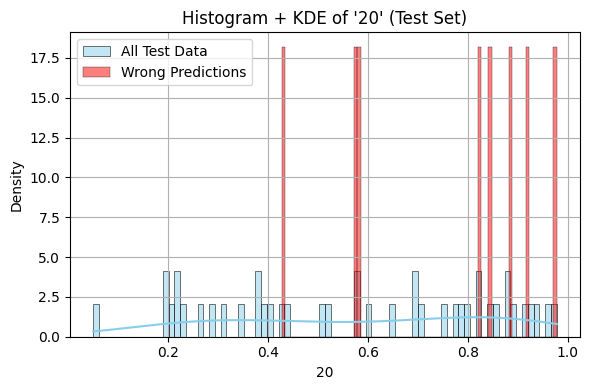

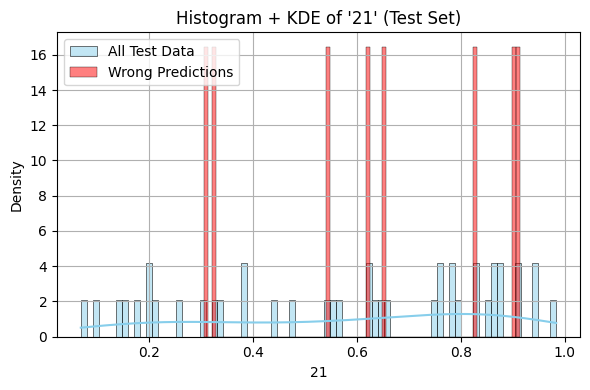

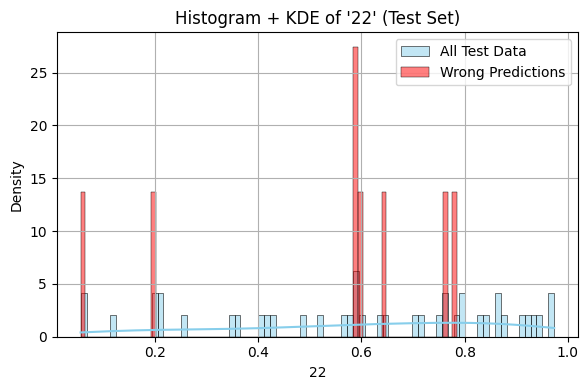

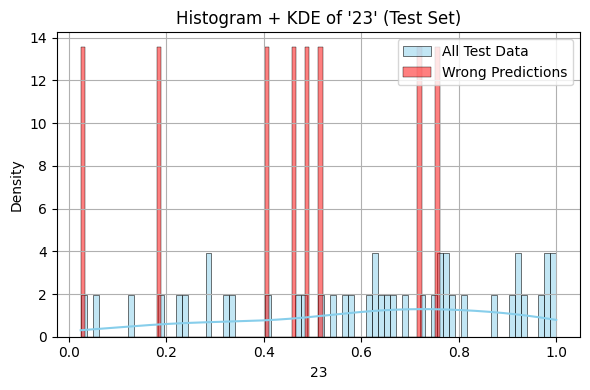

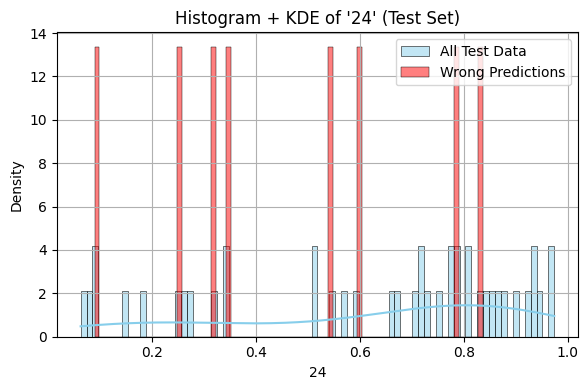

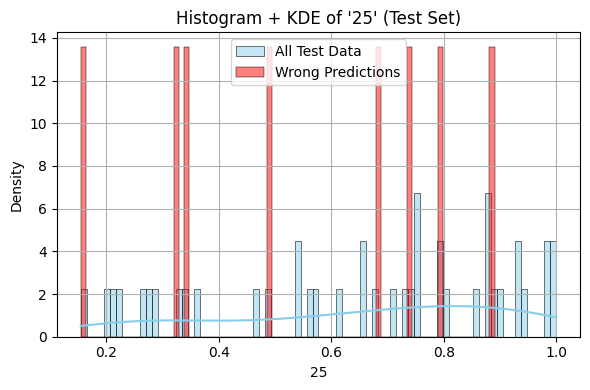

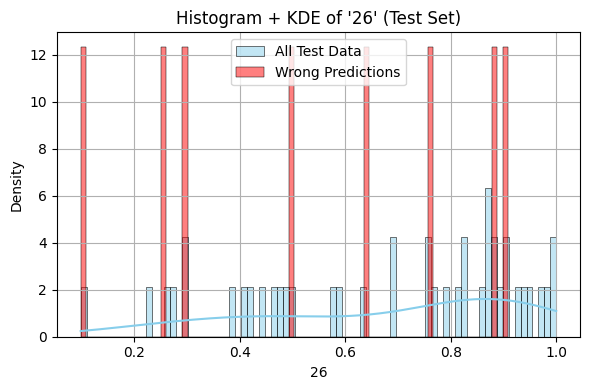

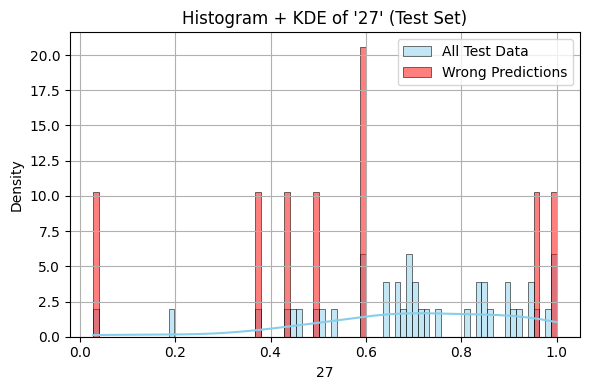

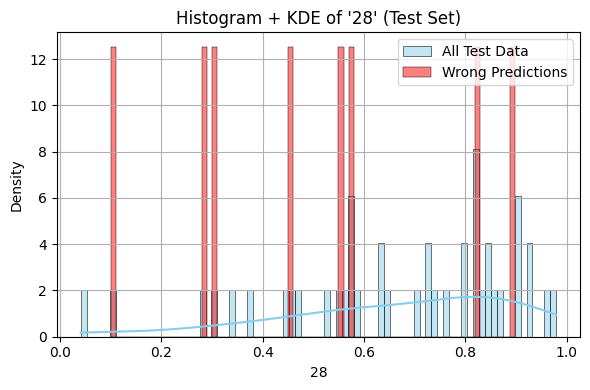

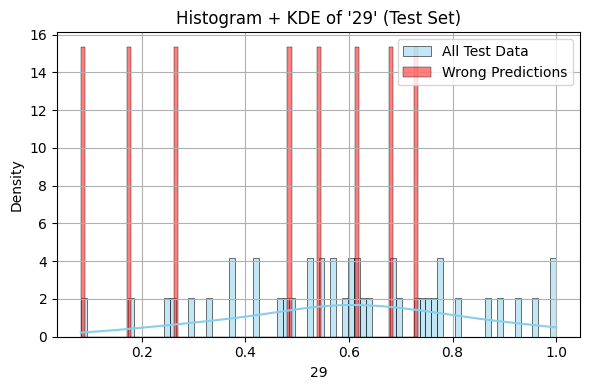

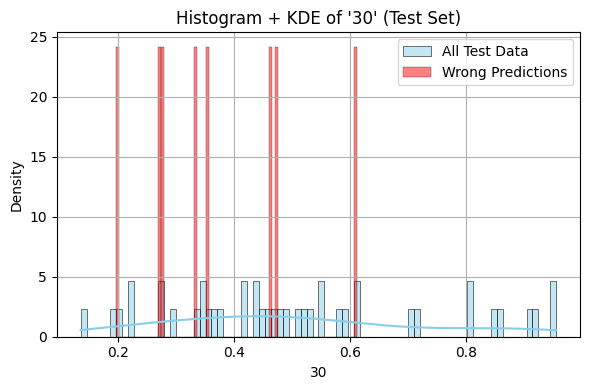

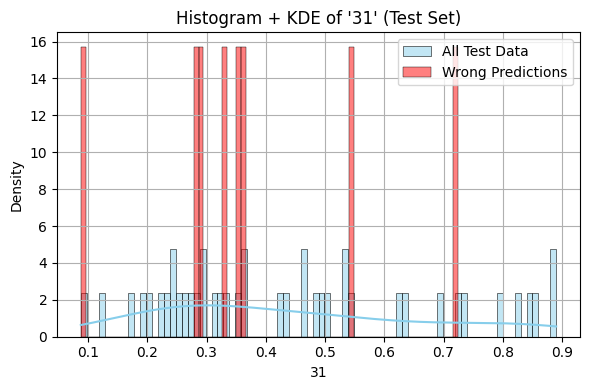

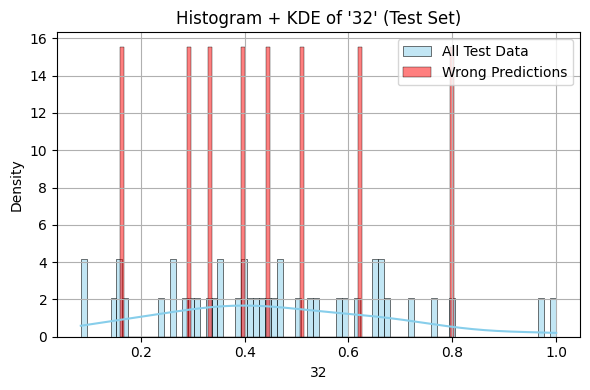

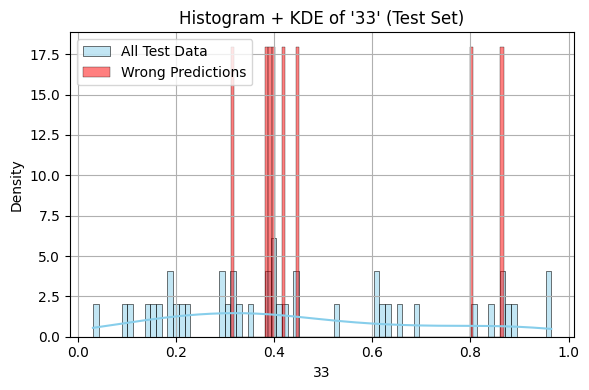

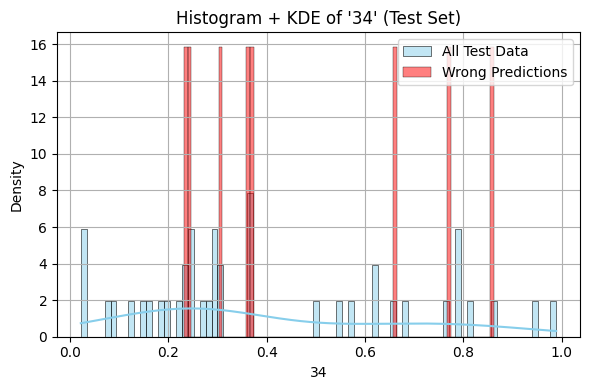

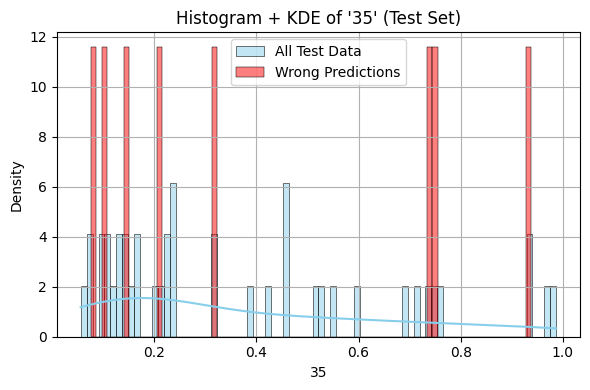

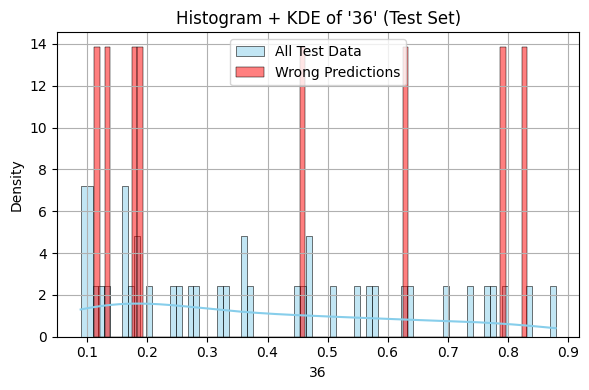

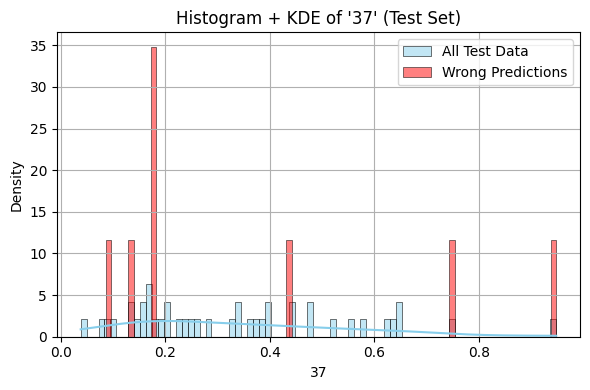

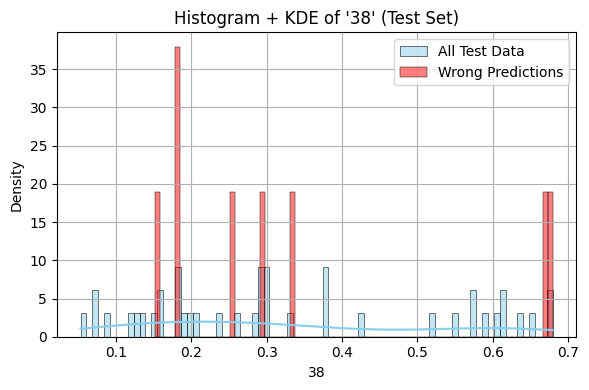

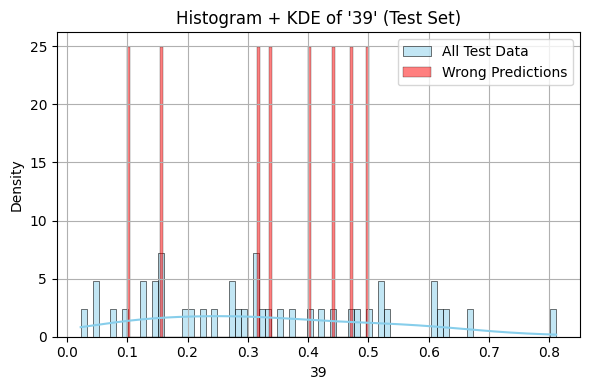

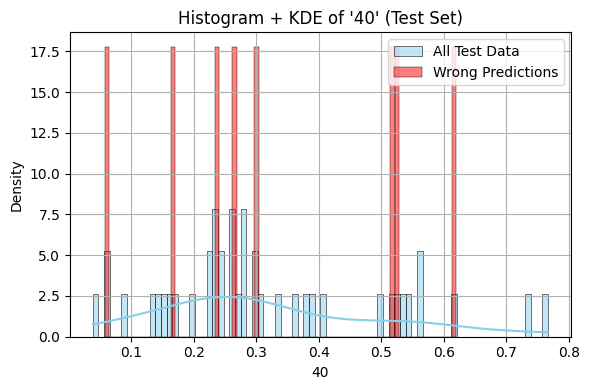

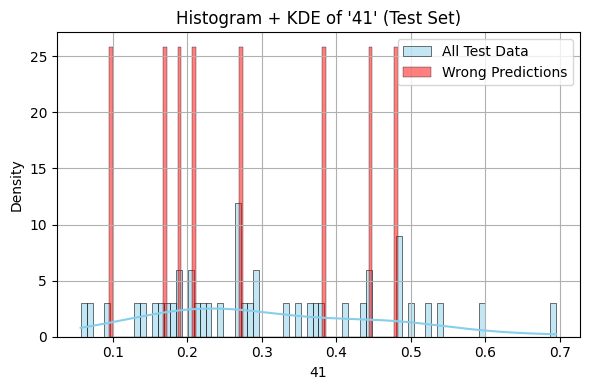

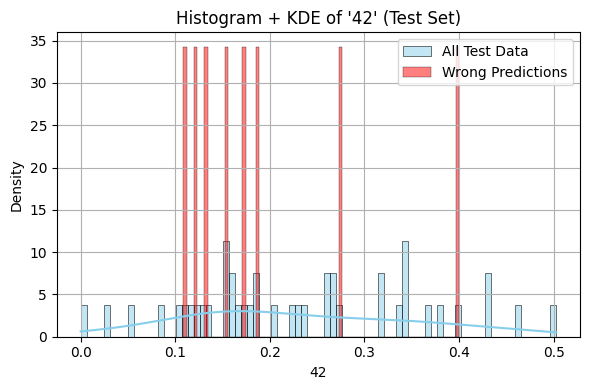

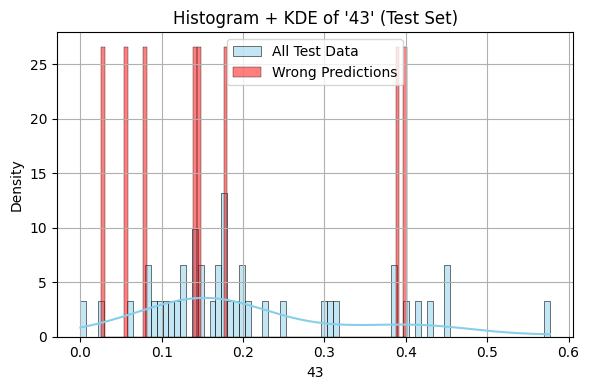

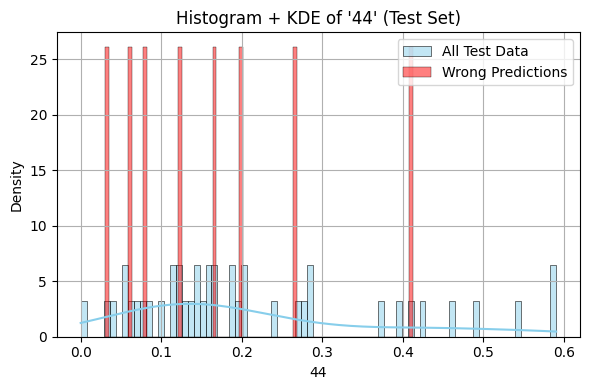

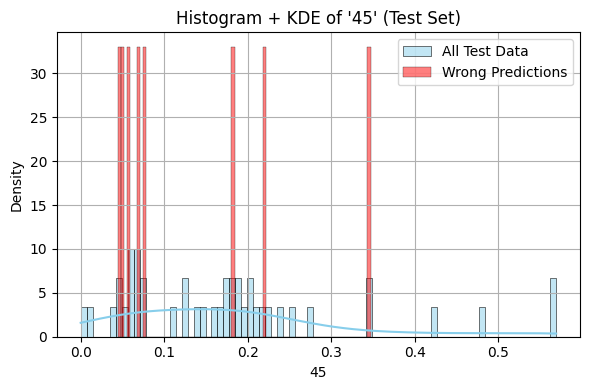

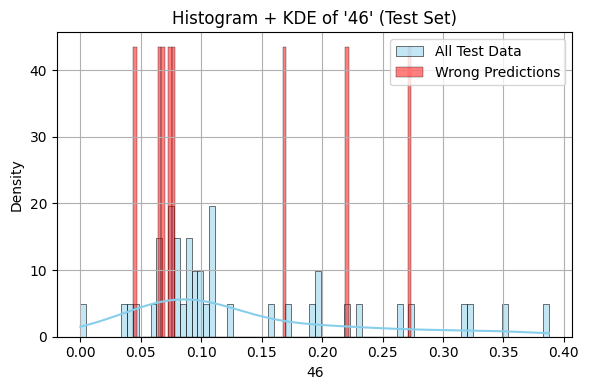

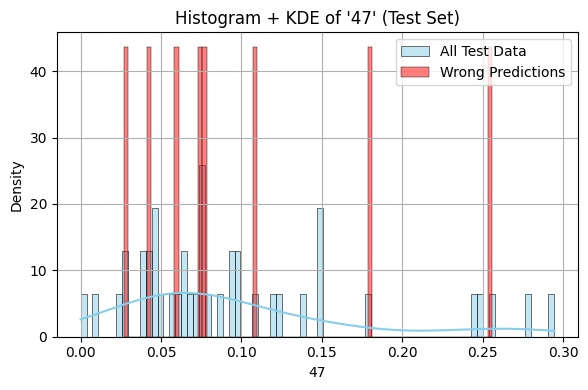

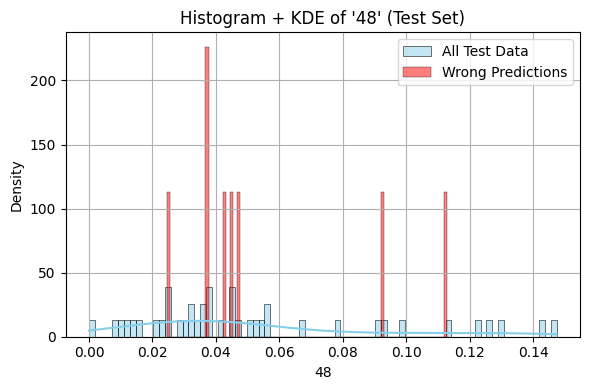

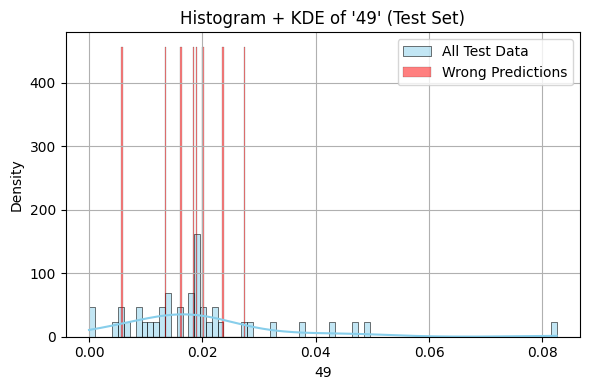

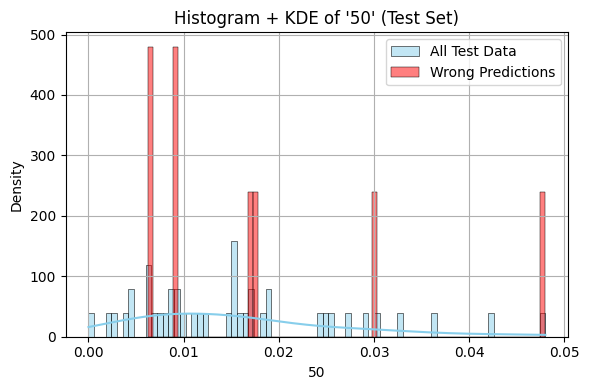

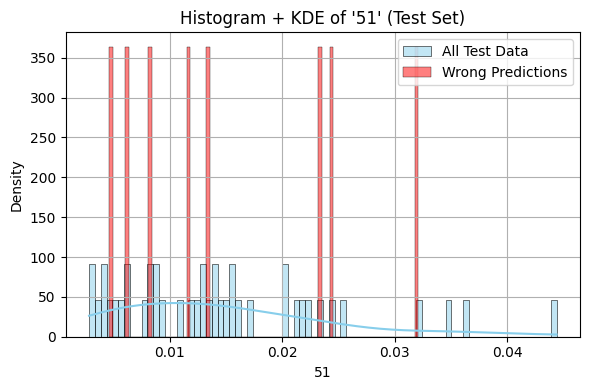

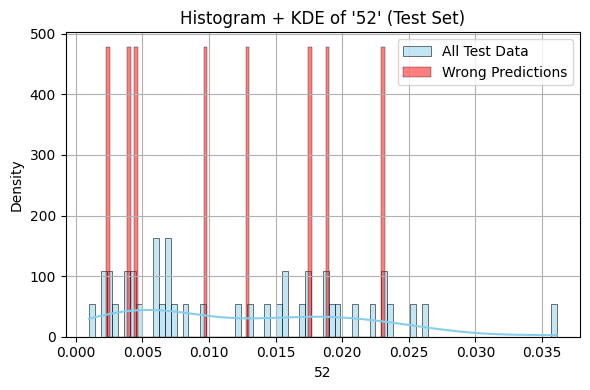

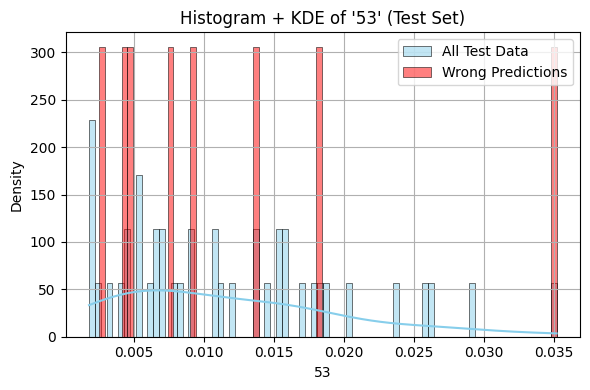

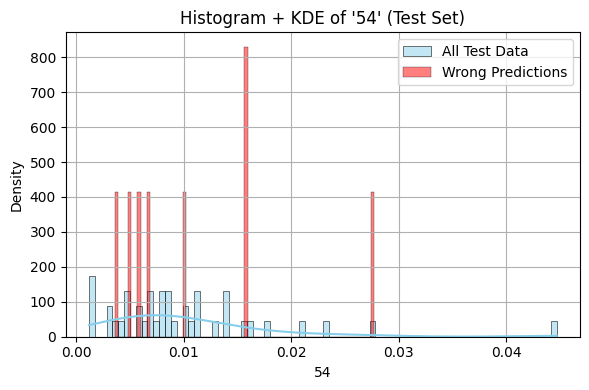

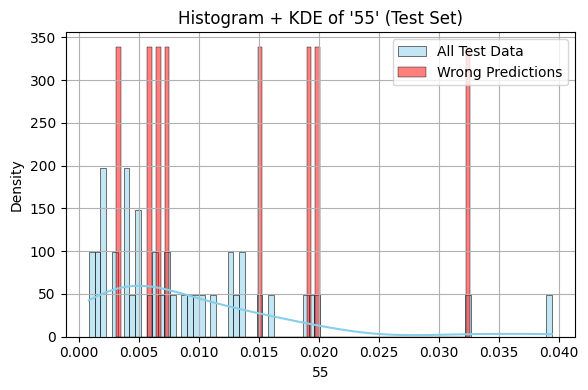

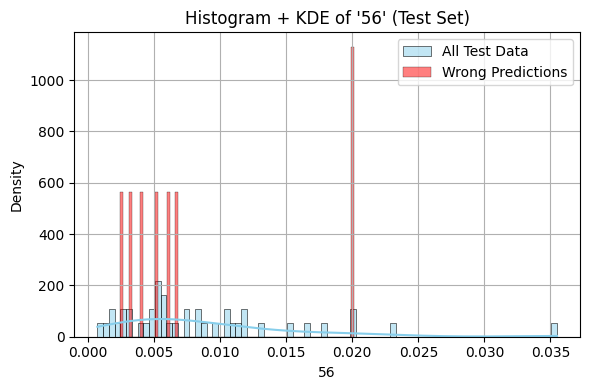

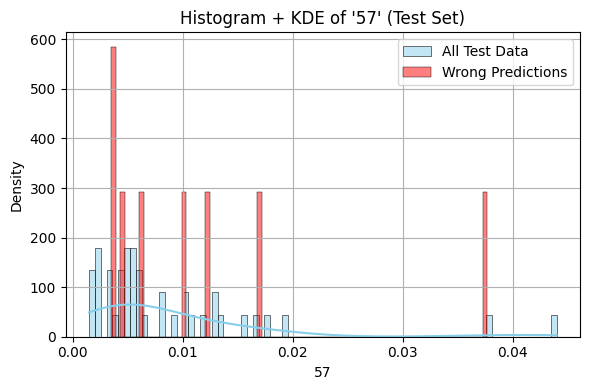

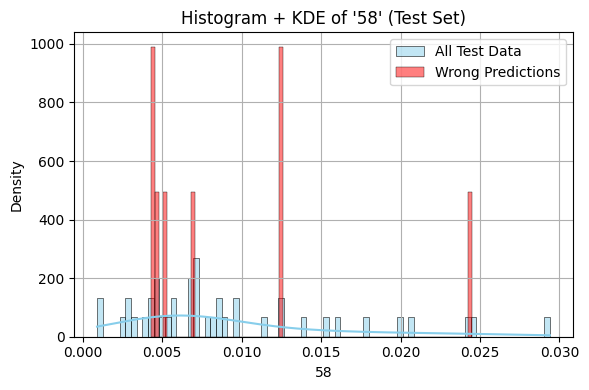

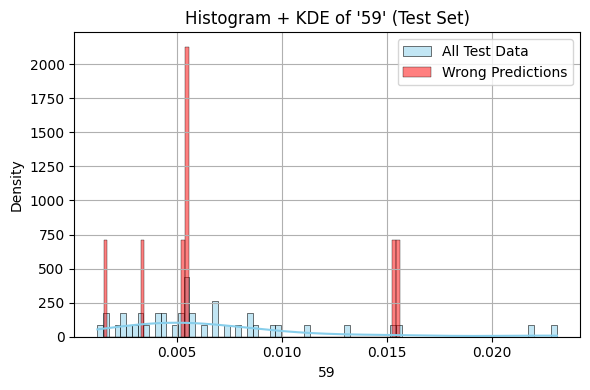

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict on test set
y_test_pred = final_model.predict(X_test)

# Step 2: Get indices of wrong predictions
wrong_indices = y_test.reset_index(drop=True)[y_test.reset_index(drop=True) != y_test_pred].index

# Step 3: Reset index for alignment
X_test_reset = X_test.reset_index(drop=True)

# Step 4: Plot for each feature
for col in X_test.columns:
    plt.figure(figsize=(6, 4))

    # Histogram + KDE for all test data
    sns.histplot(X_test_reset[col], kde=True, bins=80, color='skyblue', label='All Test Data', stat="density", alpha=0.5)

    # Histogram + KDE for wrong predictions
    sns.histplot(X_test_reset.loc[wrong_indices, col], bins=80, color='red', label='Wrong Predictions', stat="density", alpha=0.5)

    plt.title(f"Histogram + KDE of '{col}' (Test Set)")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


Confusion Matrix:


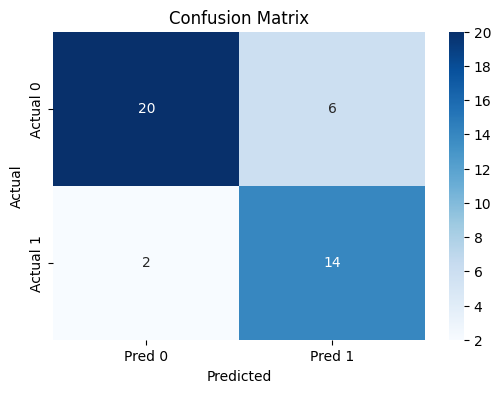

In [39]:
y_pred = final_model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Pred 0', 'Pred 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<h1 style="color:red">Best Accuracy: 0.8095</h1>

<h1>Make prediction</h1>

In [56]:
data=(0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032)
input_data = np.asarray(data)

input_data= input_data.reshape(1,-1)
prediction = final_model.predict(input_data)
if(prediction[0]=="R"):
    print("The Predicted Output Made by Ai model is Rock")

else:
    print("The Predicted Output Made by Ai model is Mine")


The Predicted Output Made by Ai model is Mine


In [57]:
from joblib import dump, load
dump(final_model, 'model.joblib')  # Export


['model.joblib']

In [58]:
loaded_model = load('model.joblib')  # Import

In [60]:
loaded_model.predict(input_data)

array(['M'], dtype=object)